In [1]:
%autosave 2

Autosaving every 2 seconds


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("ex1data1.txt", header=None)

In above cells, we imported necessary libraries, and then loaded the data 

In [4]:
data.describe()

,0,1
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [5]:
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


We divided the data into X which are the population of cities and y which consist of profit for that particular city

Plotting the data

Now we will start defining the cost function for linear regression which will take X, y and theta as input and will output the cost with parameters theta

In [6]:
def computeCost(X, y, theta):
    predictions = X.dot(theta)
    square_err = (predictions - y)**2
    return 1/(2*m) * np.sum(square_err)

In [7]:
data_n = data.values
m = len(data_n[:, -1])
X = np.append(np.ones((m, 1)), data_n[:, :-1], axis=1)
theta = np.zeros((np.shape(data_n)[1], 1)) #taking second element of tuple having shape of datan. that is, number of columns
y = data_n[:, -1].reshape(m, 1)

In [8]:
np.shape(X[:, 0])

(97,)

In [9]:
computeCost(X, y, theta)

32.072733877455676

We have successfully computed the cost, now it time to compute the gradient

In [10]:
def gradientDescent(X, y, theta, alpha, num_iters):
    J_history = [] #to store all values of costs
    for _ in range(num_iters):
        temp = np.zeros((np.shape(data_n)[1], 1)) #for simultaneous updates
        product_term = X.dot(theta)
        temp = np.dot(X.transpose(), (product_term - y))
        theta -= (alpha / m) * temp
        J_history.append(computeCost(X, y, theta))
    return J_history, theta

In [11]:
J_history, theta = gradientDescent(X, y, theta, 0.01, 1500)

In [12]:
print("h(x)={} + {}x1".format(round(theta[0, 0], 2), round(theta[1, 0], 2)))

h(x)=-3.63 + 1.17x1


Text(0.5, 1.0, 'Cost function using Gradient Descent')

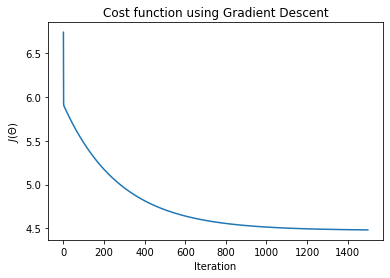

In [13]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

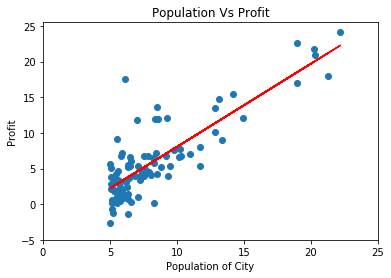

In [14]:
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], X.dot(theta), color="r")
plt.xticks(np.arange(0, 30, step=5))
plt.yticks(np.arange(-5, 30, step=5))
plt.xlabel("Population of City")
plt.ylabel("Profit")
plt.title("Population Vs Profit")
plt.show()

In [17]:
y_pred = X.dot(theta)

In [26]:
from sklearn.metrics import r2_score
accuracy = r2_score(y, y_pred)

In above cell, we measured the R-Squared score for our linear model. The perfect score is 1. Going down, we will build a linear model using sklearn and compare it with our implementation from scratch. 

Spoiler Alert: Both the models performed similarly. Now I can say I have understood Linear Models completely. 

In [27]:
accuracy

0.7016044731117159

In [28]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
regressor.intercept_

array([-3.89578088])

In [30]:
regressor.coef_

array([[0.        , 1.19303364]])

In [31]:
theta

array([[-3.63029144],
       [ 1.16636235]])

In [32]:
y_pred_regressor = regressor.predict(X)

In [33]:
accuracy_regressor = r2_score(y, y_pred_regressor)
accuracy_regressor

0.7020315537841397

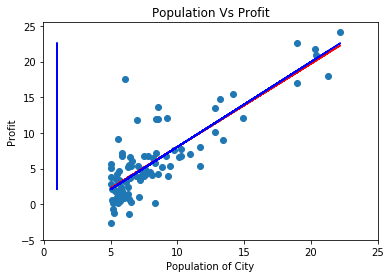

In [34]:
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], X.dot(theta), color="r")
plt.plot(X, y_pred_regressor, color="b")
plt.xticks(np.arange(0, 30, step=5))
plt.yticks(np.arange(-5, 30, step=5))
plt.xlabel("Population of City")
plt.ylabel("Profit")
plt.title("Population Vs Profit")
plt.show()